In [ ]:
!pip install mxnet gluoncv d2l

In [ ]:
# so not everything can be modeled linearly, duh.
# we have l-1 representation layer, and the last layer, (a linear layer) is 
# responsible for making predictions.

In [ ]:
# simple mlp formula

# ex: shapes for the formula
# we dont create the bias with that size tho, its replicated when being added up.

# X = 1000*764, W = 764, 256, B = 1000, 256
# H = activation(XW + B)

# H = 1000*256, W = 256, 10, B = 1000, 10
# O = HW + B,
# O = 1000, 10

# note that the bias and weights are not the same here.
# output can go through an activation(ex: softmax) if we are trying to predict
# probabilities.

In [ ]:
from d2l import mxnet as d2l
from mxnet import autograd, np, npx
npx.set_np()

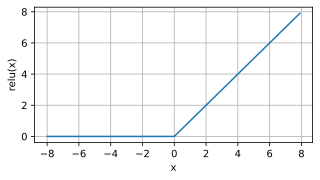

In [ ]:
# ReLU 
# simple non linear transformation.
# ReLU(x) = max(x, 0)

x = np.arange(-8.0, 8.0, 0.1)
x.attach_grad()
with autograd.record():
  y = npx.relu(x)
d2l.plot(x, y, 'x', 'relu(x)', figsize=(5, 2.5))

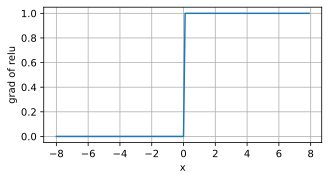

In [ ]:
y.backward()
d2l.plot(x, x.grad, 'x', 'grad of relu', figsize=(5, 2.5))
# the reason for using relu is simple, 
# easy to calculate derivatve, no vanishing with bigger inputs.

In [ ]:
# pReLU(x) = max(0, x) + α min(0, x).
# extension to let some negative inputs pass.

In [ ]:
# squashing function:
# values from (-inf, inf) are squashed into the [0, 1] range.

# sigmoid(x) = 1 / (1 + exp(−x))

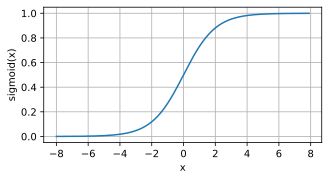

In [ ]:
with autograd.record():
  y = npx.sigmoid(x)
d2l.plot(x, y, 'x', 'sigmoid(x)', figsize=(5, 2.5))

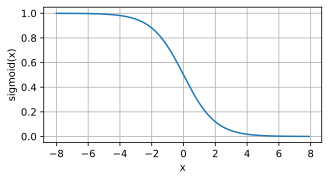

In [ ]:
y2 = 1 - (npx.sigmoid(x))
d2l.plot(x, y2, 'x', 'sigmoid(x)', figsize=(5, 2.5))

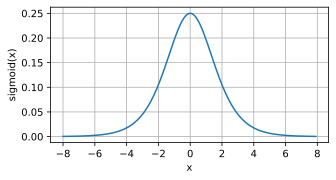

In [ ]:
d2l.plot(x, y*y2, 'x', 'sigmoid(x)', figsize=(5, 2.5))

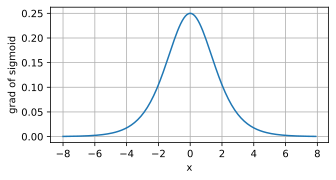

In [ ]:
y.backward()
d2l.plot(x, x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

$$ \begin{align} \dfrac{d}{dx} \sigma(x) &= \dfrac{d}{dx} \left[ \dfrac{1}{1 + e^{-x}} \right] \\ &= \dfrac{d}{dx} \left( 1 + \mathrm{e}^{-x} \right)^{-1} \\ &= -(1 + e^{-x})^{-2}(-e^{-x}) \\ &= \dfrac{e^{-x}}{\left(1 + e^{-x}\right)^2} \\ &= \dfrac{1}{1 + e^{-x}\ } \cdot \dfrac{e^{-x}}{1 + e^{-x}} \\ &= \dfrac{1}{1 + e^{-x}\ } \cdot \dfrac{(1 + e^{-x}) - 1}{1 + e^{-x}} \\ &= \dfrac{1}{1 + e^{-x}\ } \cdot \left( \dfrac{1 + e^{-x}}{1 + e^{-x}} - \dfrac{1}{1 + e^{-x}} \right) \\ &= \dfrac{1}{1 + e^{-x}\ } \cdot \left( 1 - \dfrac{1}{1 + e^{-x}} \right) \\ &= \sigma(x) \cdot (1 - \sigma(x)) \end{align} $$


In [ ]:
# tanh fn
# tanh(x) = 1 − exp(−2x) / 1 + exp(−2x)                                                                     

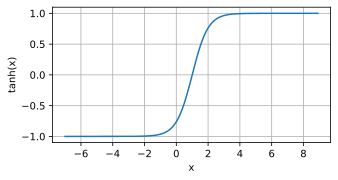

In [ ]:
with autograd.record():
  y = np.tanh(x)
d2l.plot(x+1, y, 'x', 'tanh(x)', figsize=(5, 2.5))

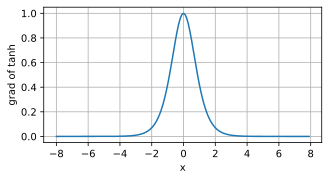

In [ ]:
# der of tanh = 1 - tanh ^ 2
y.backward()
d2l.plot(x, x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))